# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(nurons = [512,256,128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    for index,nuron in enumerate(nurons):
        if index == 0:
            x = keras.layers.Dense(units = nuron,activation = 'relu')(input_layer)
        else:
            x = keras.layers.Dense(units = nuron, activation = 'relu')(x)
    output_layer = keras.layers.Dense(units = 10,activation = 'softmax')(x)
    model = keras.models.Model(inputs = [input_layer],outputs = [output_layer])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
epoch = 50
batch_size = 256
momentum = .9
learning_rate = [1e-1,1e-2,1e-3,1e-4]


In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in learning_rate:
    model = build_mlp()
    optimizer = keras.optimizers.SGD(lr = lr, momentum = momentum,nesterov = True)
    model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)
    model.fit(x_train,y_train,
             epochs = epoch,
             batch_size = batch_size,
             validation_data = (x_test,y_test),
             shuffle = True)
    
    history = model.history.history
    index = 'SGD,lr = %s'%(lr)
    results[index] = {'val_loss':history['val_loss'],
                     'loss':history['loss'],
                     'val_accuracy':history['val_accuracy'],
                     'accuracy':history['accuracy']}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.0412 - accuracy: 0.2437 - val_loss: 2.0209 - val_accuracy: 0.2797
Epoch 2/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.8467 - accuracy: 0.3332 - val_loss: 1.9429 - val_accuracy: 0.3116
Epoch 3/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.7362 - accuracy: 0.3768 - val_loss: 1.7044 - val_accuracy: 0.3870
Epoch 4/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6591 - accuracy: 0.4060 - val_loss: 1.6648 - val_accuracy: 0.4141
Epoch 5/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.6234 - accuracy: 0.4188 - val_loss: 1.8165 - val_accuracy: 0.3650
Epoch 6/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5779 - accuracy: 0.4334 - val_loss: 1.6187 - val_accuracy: 0.4206
Epoch 7/50
50000/50000 [==============================] - 4s 81us/st

50000/50000 [==============================] - 5s 92us/step - loss: 1.4402 - accuracy: 0.4916 - val_loss: 1.5912 - val_accuracy: 0.4438
Epoch 6/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.4003 - accuracy: 0.5015 - val_loss: 1.4797 - val_accuracy: 0.4631
Epoch 7/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.3600 - accuracy: 0.5180 - val_loss: 1.5062 - val_accuracy: 0.46523600 - accuracy: 
Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.3273 - accuracy: 0.5288 - val_loss: 1.4130 - val_accuracy: 0.4982
Epoch 9/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.3019 - accuracy: 0.5384 - val_loss: 1.4352 - val_accuracy: 0.4872
Epoch 10/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.2682 - accuracy: 0.5496 - val_loss: 1.4481 - val_accuracy: 0.4867
Epoch 11/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.2435 - accuracy: 0.5590 - val

50000/50000 [==============================] - 4s 77us/step - loss: 1.5873 - accuracy: 0.4437 - val_loss: 1.5857 - val_accuracy: 0.4408
Epoch 11/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5662 - accuracy: 0.4524 - val_loss: 1.5727 - val_accuracy: 0.4471
Epoch 12/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5472 - accuracy: 0.4584 - val_loss: 1.5564 - val_accuracy: 0.4484
Epoch 13/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5300 - accuracy: 0.4640 - val_loss: 1.5404 - val_accuracy: 0.4607
Epoch 14/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5153 - accuracy: 0.4698 - val_loss: 1.5357 - val_accuracy: 0.4567
Epoch 15/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.4991 - accuracy: 0.4738 - val_loss: 1.5277 - val_accuracy: 0.4638
Epoch 16/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.4848 - accuracy: 0.4787 - val_loss: 1.5181

50000/50000 [==============================] - 4s 86us/step - loss: 1.8775 - accuracy: 0.3446 - val_loss: 1.8767 - val_accuracy: 0.3474
Epoch 16/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.8673 - accuracy: 0.3501 - val_loss: 1.8674 - val_accuracy: 0.3508
Epoch 17/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.8581 - accuracy: 0.3524 - val_loss: 1.8578 - val_accuracy: 0.3542
Epoch 18/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.8492 - accuracy: 0.3561 - val_loss: 1.8495 - val_accuracy: 0.3588
Epoch 19/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.8409 - accuracy: 0.3593 - val_loss: 1.8412 - val_accuracy: 0.3622
Epoch 20/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.8328 - accuracy: 0.3618 - val_loss: 1.8337 - val_accuracy: 0.3624
Epoch 21/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.8251 - accuracy: 0.3655 - val_loss: 1.82

In [25]:
results_Adam = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in learning_rate:
    model = build_mlp()
    optimizer = keras.optimizers.Adam(lr = lr)
    model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)
    model.fit(x_train,y_train,
             epochs = epoch,
             batch_size = batch_size,
             validation_data = (x_test,y_test),
             shuffle = True)
    
    history = model.history.history
    index = 'lr = %s'%(lr)
    results_Adam[index] = {'val_loss':history['val_loss'],
                     'loss':history['loss'],
                     'val_accuracy':history['val_accuracy'],
                     'accuracy':history['accuracy']}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 104us/step - loss: 74.7082 - accuracy: 0.1000 - val_loss: 2.3148 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.3047 - accuracy: 0.0996 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.3042 - accuracy: 0.1002 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.3048 - accuracy: 0.0997 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.3058 - accuracy: 0.0974 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 102us/step - loss: 2.3051 - accuracy: 0.0999 - val_loss: 2.3070 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 10

50000/50000 [==============================] - 5s 106us/step - loss: 1.6884 - accuracy: 0.3925 - val_loss: 1.6868 - val_accuracy: 0.3950
Epoch 6/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.6566 - accuracy: 0.4011 - val_loss: 1.6702 - val_accuracy: 0.3973
Epoch 7/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6428 - accuracy: 0.4080 - val_loss: 1.6095 - val_accuracy: 0.4198
Epoch 8/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.6230 - accuracy: 0.4153 - val_loss: 1.6734 - val_accuracy: 0.3965
Epoch 9/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.6368 - accuracy: 0.4094 - val_loss: 1.6238 - val_accuracy: 0.4171
Epoch 10/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5990 - accuracy: 0.4229 - val_loss: 1.6327 - val_accuracy: 0.4181
Epoch 11/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5914 - accuracy: 0.4273 - val_loss: 1.5

Epoch 10/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.3472 - accuracy: 0.5208 - val_loss: 1.4232 - val_accuracy: 0.4968
Epoch 11/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.3327 - accuracy: 0.5250 - val_loss: 1.4176 - val_accuracy: 0.5010
Epoch 12/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.3080 - accuracy: 0.5343 - val_loss: 1.4305 - val_accuracy: 0.4926
Epoch 13/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2912 - accuracy: 0.5390 - val_loss: 1.4001 - val_accuracy: 0.5078
Epoch 14/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.2568 - accuracy: 0.5530 - val_loss: 1.3815 - val_accuracy: 0.5102
Epoch 15/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.2456 - accuracy: 0.5563 - val_loss: 1.3930 - val_accuracy: 0.5107
Epoch 16/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.2092 - accuracy: 0.5668

Epoch 15/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2869 - accuracy: 0.5477 - val_loss: 1.3862 - val_accuracy: 0.5096
Epoch 16/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2713 - accuracy: 0.5539 - val_loss: 1.4096 - val_accuracy: 0.5016
Epoch 17/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2508 - accuracy: 0.5607 - val_loss: 1.3836 - val_accuracy: 0.5155
Epoch 18/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.2332 - accuracy: 0.5677 - val_loss: 1.3784 - val_accuracy: 0.5150
Epoch 19/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.2127 - accuracy: 0.5766 - val_loss: 1.3779 - val_accuracy: 0.5100
Epoch 20/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.2023 - accuracy: 0.5808 - val_loss: 1.3585 - val_accuracy: 0.5210
Epoch 21/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.1878 - accuracy: 0.5846

In [26]:
results_Adagrad = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in learning_rate:
    model = build_mlp()
    optimizer = keras.optimizers.Adam(lr = lr)
    model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)
    model.fit(x_train,y_train,
             epochs = epoch,
             batch_size = batch_size,
             validation_data = (x_test,y_test),
             shuffle = True)
    
    history = model.history.history
    index = 'lr = %s'%(lr)
    results_Adagrad[index] = {'val_loss':history['val_loss'],
                     'loss':history['loss'],
                     'val_accuracy':history['val_accuracy'],
                     'accuracy':history['accuracy']}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 122us/step - loss: 104.4419 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.3038 - accuracy: 0.0977 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.3043 - accuracy: 0.1011 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.3049 - accuracy: 0.1004 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.3051 - accuracy: 0.1028 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.3055 - accuracy: 0.0982 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s

50000/50000 [==============================] - 6s 111us/step - loss: 1.6654 - accuracy: 0.4000 - val_loss: 1.6510 - val_accuracy: 0.4083
Epoch 6/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.6476 - accuracy: 0.4054 - val_loss: 1.6345 - val_accuracy: 0.4113
Epoch 7/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.6223 - accuracy: 0.4167 - val_loss: 1.6452 - val_accuracy: 0.4068
Epoch 8/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.5980 - accuracy: 0.4234 - val_loss: 1.7687 - val_accuracy: 0.3733
Epoch 9/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5978 - accuracy: 0.4255 - val_loss: 1.5873 - val_accuracy: 0.4323
Epoch 10/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.5800 - accuracy: 0.4283 - val_loss: 1.5893 - val_accuracy: 0.4244
Epoch 11/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5695 - accuracy: 0.4362 - val_loss: 1.5

Epoch 10/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.3574 - accuracy: 0.5170 - val_loss: 1.4762 - val_accuracy: 0.4749
Epoch 11/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.3191 - accuracy: 0.5284 - val_loss: 1.4012 - val_accuracy: 0.4994
Epoch 12/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.2994 - accuracy: 0.5366 - val_loss: 1.3680 - val_accuracy: 0.5123
Epoch 13/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.2754 - accuracy: 0.5448 - val_loss: 1.3827 - val_accuracy: 0.5158
Epoch 14/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.2417 - accuracy: 0.5556 - val_loss: 1.4231 - val_accuracy: 0.4996
Epoch 15/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.2248 - accuracy: 0.5635 - val_loss: 1.4064 - val_accuracy: 0.5040
Epoch 16/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.2065 - accuracy: 0.5699

Epoch 15/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2816 - accuracy: 0.5536 - val_loss: 1.3744 - val_accuracy: 0.5152
Epoch 16/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.2594 - accuracy: 0.5598 - val_loss: 1.3525 - val_accuracy: 0.5180
Epoch 17/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2450 - accuracy: 0.5625 - val_loss: 1.3525 - val_accuracy: 0.5200
Epoch 18/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2312 - accuracy: 0.5690 - val_loss: 1.3688 - val_accuracy: 0.5175
Epoch 19/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.2097 - accuracy: 0.5785 - val_loss: 1.3408 - val_accuracy: 0.5266
Epoch 20/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.1982 - accuracy: 0.5819 - val_loss: 1.3648 - val_accuracy: 0.5136
Epoch 21/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.1804 - accuracy: 0.5899

In [29]:
results_RMSProp = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in learning_rate:
    model = build_mlp()
    optimizer = keras.optimizers.RMSprop(lr = lr)
    model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)
    model.fit(x_train,y_train,
             epochs = epoch,
             batch_size = batch_size,
             validation_data = (x_test,y_test),
             shuffle = True)
    
    history = model.history.history
    index = 'lr = %s'%(lr)
    results_RMSProp[index] = {'val_loss':history['val_loss'],
                     'loss':history['loss'],
                     'val_accuracy':history['val_accuracy'],
                     'accuracy':history['accuracy']}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 90us/step - loss: 22050.5428 - accuracy: 0.1033 - val_loss: 2.3131 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 87us/step - loss: 157.3265 - accuracy: 0.0974 - val_loss: 2.3161 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.3078 - accuracy: 0.0994 - val_loss: 2.3148 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.3079 - accuracy: 0.0995 - val_loss: 2.3145 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.3074 - accuracy: 0.1020 - val_loss: 2.3138 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.3079 - accuracy: 0.1006 - val_loss: 2.3097 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 8

50000/50000 [==============================] - 4s 89us/step - loss: 1.9543 - accuracy: 0.2801 - val_loss: 2.1512 - val_accuracy: 0.2243
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.9291 - accuracy: 0.2923 - val_loss: 1.9760 - val_accuracy: 0.2751
Epoch 7/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.9058 - accuracy: 0.3057 - val_loss: 1.8987 - val_accuracy: 0.3019
Epoch 8/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.8944 - accuracy: 0.3066 - val_loss: 1.8710 - val_accuracy: 0.3142
Epoch 9/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.8725 - accuracy: 0.3130 - val_loss: 1.8563 - val_accuracy: 0.3089
Epoch 10/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.8691 - accuracy: 0.3176 - val_loss: 1.8607 - val_accuracy: 0.3063
Epoch 11/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.8578 - accuracy: 0.3158 - val_loss: 1.8815 - v

50000/50000 [==============================] - 5s 90us/step - loss: 1.4759 - accuracy: 0.4746 - val_loss: 1.6110 - val_accuracy: 0.4201
Epoch 11/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.4442 - accuracy: 0.4849 - val_loss: 1.4865 - val_accuracy: 0.4705
Epoch 12/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4185 - accuracy: 0.4943 - val_loss: 1.5289 - val_accuracy: 0.4451
Epoch 13/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.3928 - accuracy: 0.5036 - val_loss: 1.5111 - val_accuracy: 0.4687
Epoch 14/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.3726 - accuracy: 0.5109 - val_loss: 1.5826 - val_accuracy: 0.4458
Epoch 15/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.3470 - accuracy: 0.5188 - val_loss: 1.4910 - val_accuracy: 0.4831
Epoch 16/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.3210 - accuracy: 0.5281 - val_loss: 1.638

Epoch 15/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.3730 - accuracy: 0.5161 - val_loss: 1.5411 - val_accuracy: 0.4558
Epoch 16/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.3559 - accuracy: 0.5262 - val_loss: 1.4661 - val_accuracy: 0.4818
Epoch 17/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.3400 - accuracy: 0.5303 - val_loss: 1.4693 - val_accuracy: 0.4731
Epoch 18/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.3221 - accuracy: 0.5358 - val_loss: 1.4999 - val_accuracy: 0.4740
Epoch 19/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.3098 - accuracy: 0.5400 - val_loss: 1.4408 - val_accuracy: 0.4814
Epoch 20/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.2937 - accuracy: 0.5458 - val_loss: 1.4181 - val_accuracy: 0.4894
Epoch 21/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.2808 - accuracy: 0.5509 -

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color =['r','g','b','k']
def plot_pic(results_SGD,results_Adam,results_Adagrad,results_RMSprop):
    results = [results_SGD,results_Adam,results_Adagrad,results_RMSprop]
    name = ['SGD','Adam','Adagrad','RMSprop']
    fig,axes = plt.subplots(4,2,sharex = True)
    fig.set_size_inches(20,20)
    for index,result in enumerate(results):
        #plt.subplot(4,2,index*2+1)
        for i,values in enumerate(result.keys()):
            axes[index][0].plot(range(len(result[values]['val_loss'])),result[values]['val_loss'],'--',label = values + name[index],color = color[i])
            axes[index][0].plot(range(len(result[values]['loss'])),result[values]['loss'],'-',label = values + name[index],color = color[i])
            axes[index][1].plot(range(len(result[values]['val_accuracy'])),result[values]['val_accuracy'],'--',label = values + name[index],color = color[i])
            axes[index][1].plot(range(len(result[values]['accuracy'])),result[values]['accuracy'],'-',label = values + name[index],color = color[i])
            #plt.plot(range(len(result[values]['val_loss'])),result[values]['val_loss'],'--',label = values,color = color[i])
            #plt.plot(range(len(result[values]['loss'])),result[values]['loss'],'-',label = values,color = color[i])
        #plt.legend()
        #plt.title(name + 'loss')
        #plt.subplot(4,2,index*2+2)
        #for i,values in enumerate(result.keys()):
            #plt.plot(range(len(result[values]['val_accuracy'])),result[values]['val_accuracy'],'--',label = values,color = color[i])
            #plt.plot(range(len(result[values]['accuracy'])),result[values]['accuracy'],'-',label = values,color = color[i])
        #plt.legend()
        #plt.title(name + 'accuracy')

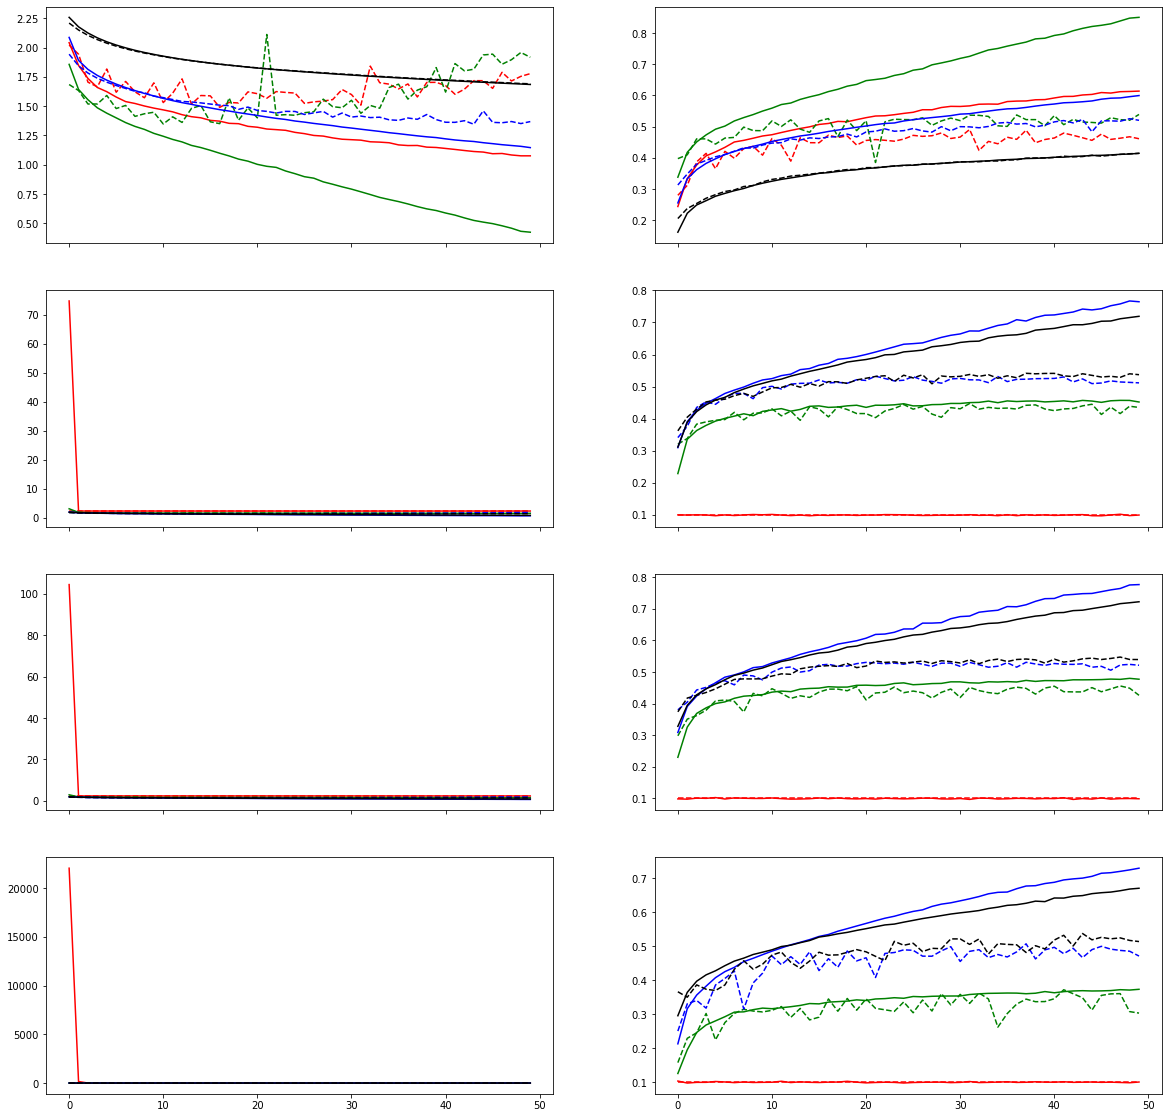

In [46]:
plot_pic(results,results_Adam,results_Adagrad,results_RMSProp)